In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_folder = '../data'

In [4]:
with open(os.path.join(data_folder, 'all_data.npy'), 'rb') as f:
    np_data = np.load(f)

In [5]:
np_data.shape

(362, 3500, 8)

In [12]:
sampling_freq = 50
features_needed = [0, 1]

In [13]:
feature_maps = {
    0: 'x',
    1: 'y',
    2: 'Forward Velocity',
    3: 'Angular Velocity',
    4: 'Theta',
    5: 'Unwrapped Theta',
    6: 'Upwind Velocity',
    7: 'Fly ID'
}

In [37]:
trimmed_train_data = np_data[:360, :sampling_freq*40, features_needed]
trimmed_test_data = np_data[360:, :sampling_freq*40, features_needed]

In [38]:
trimmed_train_data.shape

(360, 2000, 2)

In [39]:
trimmed_train_data[:, :, 1].max()

139.99

In [40]:
trimmed_train_data[:, :, 1].min()

0.0

In [41]:
from matplotlib import animation
from IPython.display import HTML

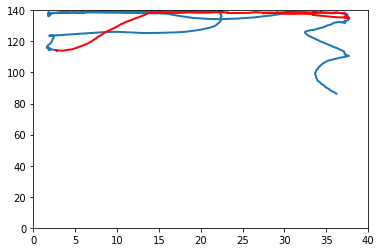

In [47]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 40), ylim=(0, 140))
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2, color='r')

exp = 5

def init():
    line.set_data([], [])
    line2.set_data([], [])
    return [line, line2]


def animate(i):
    if i < 1500:
        x = trimmed_train_data[exp, :i+1, 0]
        y = trimmed_train_data[exp, :i+1, 1]
        line.set_data(x, y)
    if i >= 1500:
        x = trimmed_train_data[exp, 1500:i+1, 0]
        y = trimmed_train_data[exp, 1500:i+1, 1]
        line2.set_data(x, y)
    
    return [line,line2]


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=20, blit=True)

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
# plt.show()

HTML(anim.to_html5_video())

In [45]:
trimmed_train_data[1, :200+1, 0]

array([20.809 , 20.463 , 20.132 , 19.775 , 19.458 , 18.989 , 18.598 ,
       18.237 , 17.851 , 17.561 , 17.239 , 16.883 , 16.492 , 16.121 ,
       15.734 , 15.345 , 14.945 , 14.549 , 14.172 , 13.785 , 13.342 ,
       12.988 , 12.57  , 12.168 , 11.816 , 11.429 , 11.083 , 10.645 ,
       10.277 ,  9.9172,  9.4907,  9.0539,  8.6574,  8.2791,  7.8514,
        7.4733,  7.112 ,  6.7119,  6.4129,  6.0834,  5.7022,  5.3352,
        4.9174,  4.707 ,  4.4596,  4.4834,  4.4497,  4.3311,  4.1227,
        3.9849,  3.7674,  3.5327,  3.268 ,  3.0086,  2.732 ,  2.4895,
        2.2129,  1.9637,  1.7318,  1.5315,  1.4411,  1.4643,  1.5008,
        1.5546,  1.5347,  1.5249,  1.5448,  1.5432,  1.5447,  1.536 ,
        1.5286,  1.5344,  1.5389,  1.527 ,  1.5489,  1.5621,  1.565 ,
        1.5726,  1.5863,  1.5867,  1.5641,  1.5537,  1.5768,  1.5753,
        1.5727,  1.5869,  1.5759,  1.5708,  1.5779,  1.5537,  1.5899,
        1.6272,  1.6899,  1.6621,  1.7185,  1.7225,  1.6746,  1.5896,
        1.5483,  1.5